# Evaluation terminale : Machine learning & python -- CHONG Jong Hoa

Cet examen se compose de 3 parties : 
<ol>
  <li>Restitution théorique</li>
  <li>Restitution pratique</li>
  <li>Cas pratique</li>
</ol>

## Partie 1 : Restitution théorique

Pour cette partie, l'objectif est de décrire des notions théoriques. Essayez de rédiger des réponses claires en utilisant vos mots.

#### Question 1.1: Donner une définition du machine learning. Eviter de recopier de wikipédia, essayer d'en donner une description en quelques mots.

Le machine learning est une méthode de traitement de l'information qui permet à une machine de "apprendre" sans être explicitement programmée. La machine est capable de s'adapter et de s'améliorer en analysant une très grande quantité de données. Il est largement utilisé pour résoudre des problèmes complexes et prédire des résultats à partir de données massives.

#### Question 1.2: Donner quelques applications concrètes d'utilisation du machine learning.

Cibler les annonces en fonctions des besoins des utilistateurs afin optimiser les campagnes publicitaires.
Perfectionner la reconnaissance vocale en ameliorant la précision de la reconnaissnce de la parole.
Prédire la probabilité de de développer certaines maladies dans le domaine de la santé.


#### Question 1.3: Quelles sont les 2 principales familles "d'apprentissage"? Donner une rapide définition de chacune

Apprentissage supervisé : L'apprentissage supervisé d'une machine apprenante provient d'un jeu de données très important. C'est à partir de cette base que l'algorithme commence à apprendre. Elle va donc réaliser des tâches et ses premières réponses seront corrigées à la main, pour qu'elle s'améliore au fur et à mesure.

Apprentissage non supervise : En comparaison d'un apprentissage supervisé, un apprentissage non supervisé va créer ses propres réponses car les réponses que l'on cherche à prédire ne sont pas disponibles dans les jeux de données. Elle propose ainsi des réponses à partir d'analyses et de groupement de données.

#### Question 1.4: Dans laquelle de ces familles appartient la "classification"? Le "clustering"?

#### Question 1.5: Définissez ce qu'est un arbre de décision et décrivez  de manière simple sa construction.

Un arbre de décision est un outil de prise de décision en Machine Learning. Il s'agit d'un diagramme qui utilise des branches pour représenter les différentes possibilités et les conséquences de choix différents.

Pour construire un arbre de décision, on doit d'abord définir un problème à résoudre. Ensuite, on identifie les différents critères qui peuvent impacter la décision à prendre, et on les organise en utilisant des branches. Chaque branche représente une possibilité en fonction du critère, et chaque feuille de l'arbre représente une décision finale.

#### Question 1.6: Dans quelle situation parle-t-on "d'overfitting"?

L'overfitting est une situation quand un modèle de machine learning est trop complexe et qu'il s'adapte bien aux données d'entraînement, mais pas aux données de test. C'est à dire le modèle a appris à prédire les étiquettes de ces données d'entraînement de manière trop précise, mais qu'il ne généralisera pas bien ses prédictions à de nouvelles données.

## Partie 2 : Etude d'un cas pratique

Pour cette partie, vous devrez vous inspirer des TP réalisés en cours. 

Il vous faut importer les librairies qui vous seront nécessaires répondre à la problèmatique dans la cellule suivante :

In [1]:
# packages
import pandas as pd
#...
#from pandas_profiling import ProfileReport
# importing packages
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



Importez les données comme suit :

In [2]:
data = pd.read_csv('nba_logreg.csv')

Ce jeu de données décrit les caracteristiques de jeu de joueurs de Basketball au sein de la NBA. La variable d'intérêt Y est "TARGET_5yrs". La description de ce dataset se trouve dans le fichier "NBA_variables_doc.png"

__L'objectif du problème est de réussir à prédire si un jeune joueur durera plus ou moins que 5ans au sein de la ligue.__

In [3]:
data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.1: Donnez au moins une colonne qui doit être enlevé du jeu de données. Pourquoi? 

On peut enlever "name" car on est interessé par les statistiques d'un joueur en général.
On peut également enlever soit "3PA" soit "3P%" car tout les deux indiquent 3PointAttempts

#### Exercice 2.1: Enlevez les variables du dataset qui vous semble inutile au problème.

In [4]:
data.drop(columns=['Name'], axis=1, inplace=True)

In [5]:
data.drop(columns=['3P%'], axis=1, inplace=True)

In [6]:
data

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.2: Ce dataset contient - il des données manquantes ou non exploitable?

Non

In [7]:
data['TARGET_5Yrs'].isnull().sum()/len(data)

0.0

#### Exercice 2.2: Si oui, donnez en la proportion par colonne.

In [8]:
# code..

#### Exercice 2.3: Séparez les données en 2 échantillons train-test

In [9]:
# model variables definitions
Y = data['TARGET_5Yrs']
X = data.drop(labels=['TARGET_5Yrs'], axis=1)

# splitting into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

#### Question 2.3: Pourquoi cette étape est-elle indispensable?

Réponse 

#### Exercice 2.4: Entrainez sur ces données un arbre de décision. Calculer une prédiction.

In [15]:
# model variables definitions
Y = data['TARGET_5Yrs']
X = data.drop(labels=['TARGET_5Yrs'], axis=1)

# splitting into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

# calling decisiontree classifier
clf = DecisionTreeClassifier()
#criterion= 'entropy', max_depth=max_depth, min_samples_split=0.1
# fitting on data
clf = clf.fit(X_train, Y_train)


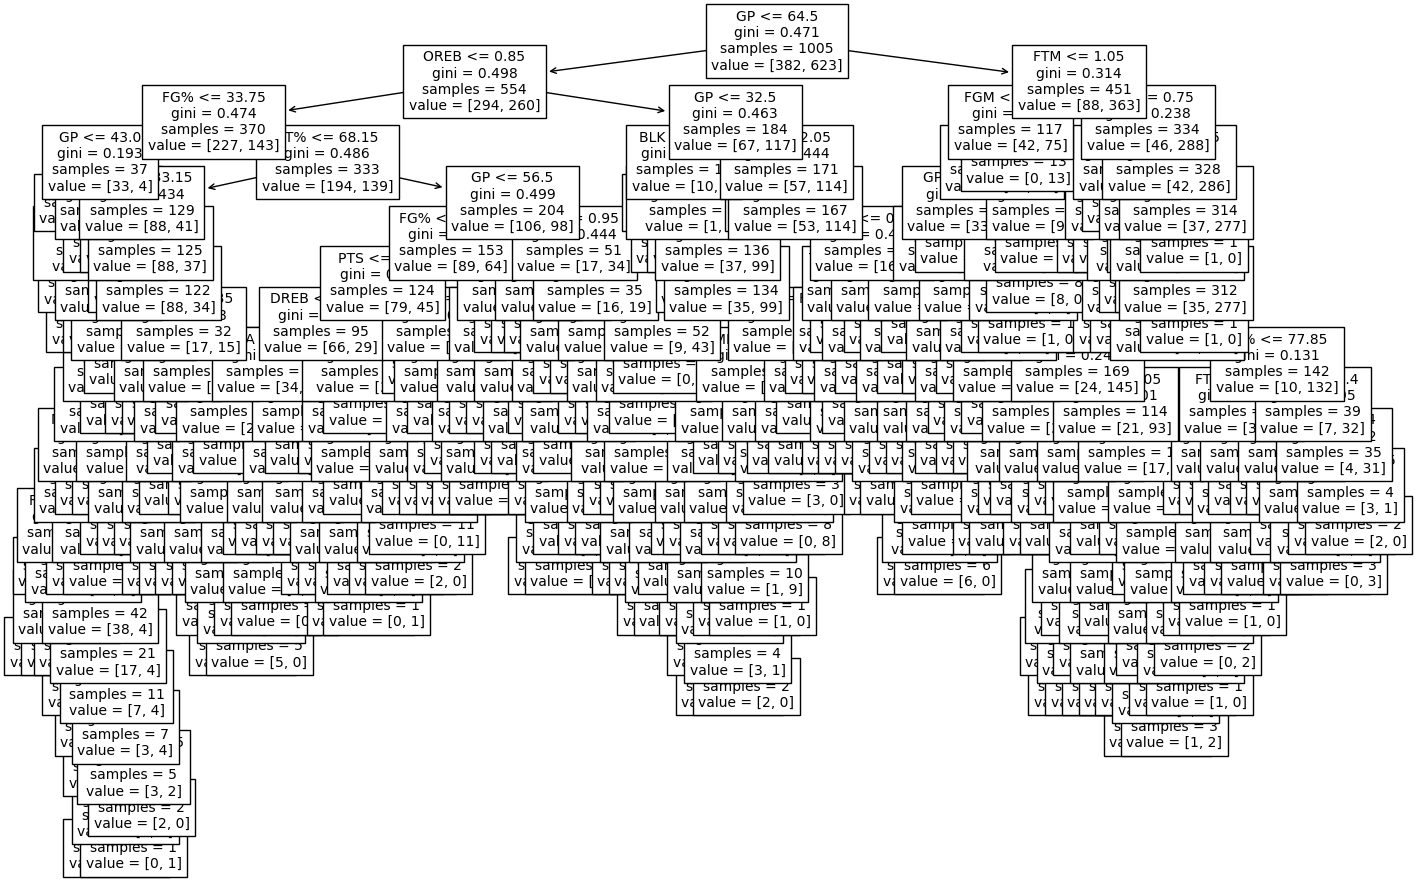

In [17]:
# plotting tree
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Exercice 2.5: Evaluez la qualité du modèle. 

In [14]:
# estimating on test
estimate = clf.predict_proba(X_test)[:,1]
true = Y_test
# building AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate)
auc_ = auc(fpr, tpr)
print(auc_)

0.5934660811629315


#### Question 2.4: Quelle métrique utilisez vous? Pourquoi? 

Métrique d'évaluation AUC

#### Question 2.5: Le modèle construit est-il de qualité satisfaisante? Expliquez.

Non car auc est seulement à 0,58. L'ideal est d'avoir auc proche de 1, afin d'éviter les fausses prédictions.

#### Exercice 2.6: Produisez une visualisation graphique de l'arbre construit

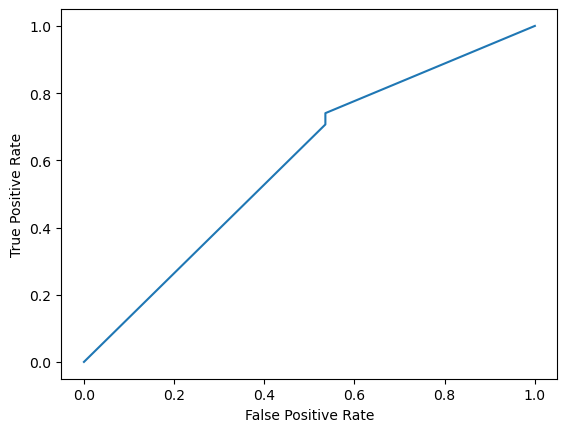

In [18]:
plt.plot(fpr,tpr)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Question 2.6: Donnez un exemple de lecture d'un tel arbre.

La courbe est pratiquement droite, il y a plus de chance d'avoir des predictions fausses.

#### Question 2.7: Comment peut - on améliorer la qualité du modèle? Donnez au moins 3 méthodes:

Par cross-validation, hyperparameters gridsearch, et randomForest

#### Exercice 2.7: Essayer d'appliquer une de ces méthodes

In [17]:
# Hyperparameters space
param_space = {'criterion':[ 'entropy', 'gini'], 
               'max_depth': list(range(2,10,1)),
               #'min_samples_split':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.],
               'min_samples_split':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07],
               'random_state': [42]}

# calling classifier
clf_grid = DecisionTreeClassifier()

# running search
grid_search_tree = GridSearchCV(estimator=clf_grid,
                                param_grid=param_space,
                                scoring='roc_auc',
                                cv=8)
# running search
grid_search_tree.fit(X, Y.values)

# getting best model
best_parameters = grid_search_tree.best_params_
best_auc = grid_search_tree.best_score_
print('best parameters: ' + str(best_parameters))
print('best auc: ' + str(best_auc))

best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 0.01, 'random_state': 42}
best auc: 0.7062433475391416


In [18]:
# calling decisiontree classifier
clf = DecisionTreeClassifier(criterion= 'gini', max_depth=3, min_samples_split=0.1, random_state=42)
#
# fitting on data
clf = clf.fit(X_train, Y_train)
# estimating on test
estimate = clf.predict_proba(X_test)[:,1]
true = Y_test
# building AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate)
auc_ = auc(fpr, tpr)
print(auc_)

0.6969639612356149


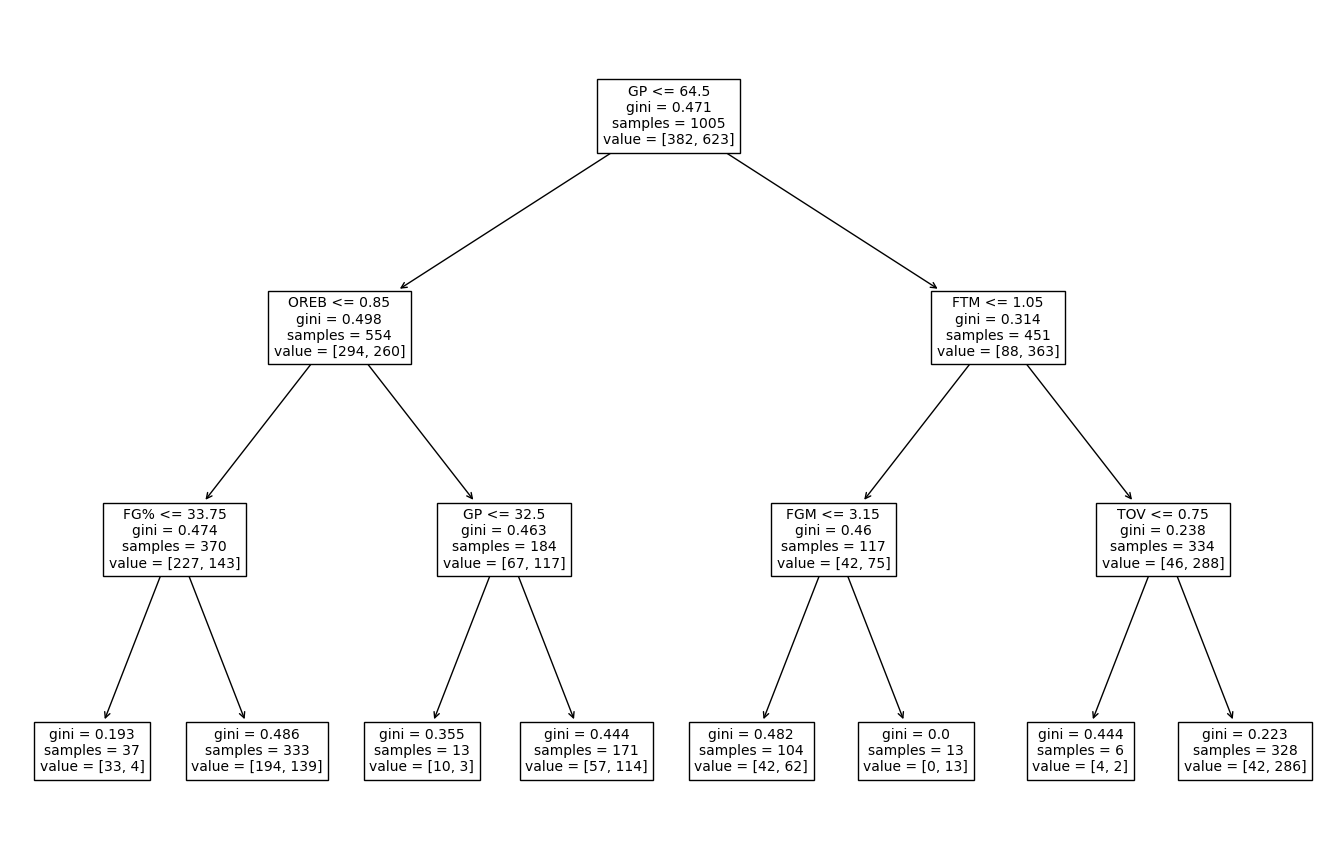

In [19]:
# plotting tree
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

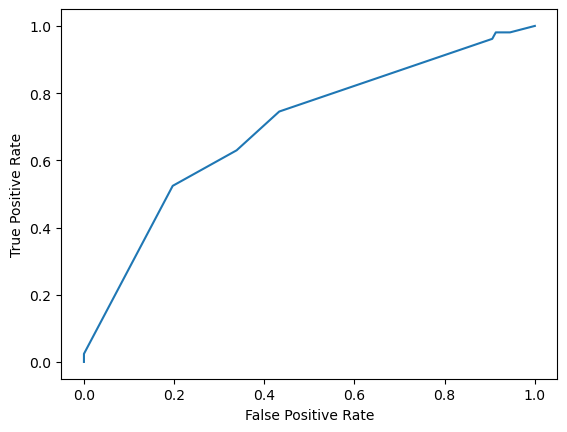

In [20]:
plt.plot(fpr,tpr)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Question 2.8: Concluez

La representation graphique est plus proche de la courbe ROC et on a un auc plus proche de 0,7 qui est très bien.